In [1]:
import pandas as pd
import numpy as np
import shmapy

### Shmapy

In [2]:
states = pd.DataFrame(pd.read_csv('../static/demo_input1.csv')['state'])
states['values'] = np.random.random(states.shape[0])
states.head()

,state,values
0,AK,0.234248
1,AL,0.574742
2,AR,0.492913
3,AZ,0.984303
4,CA,0.299015


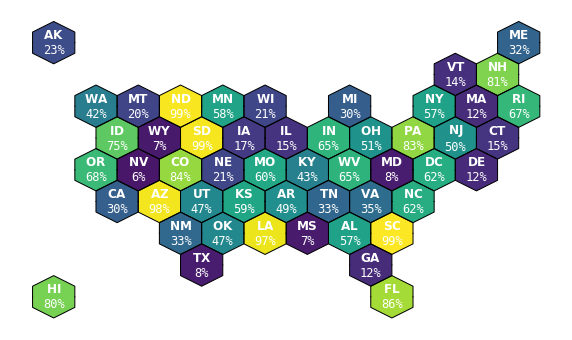

In [3]:
shmapy.us_plot_hex(
    states, 
    chart_type='choropleth', 
    numeric_labels='all',
    line_color='black',
    figsize=(10,6),
    size=12
)

In [4]:
states['category'] = np.random.choice(['Apple', 'Cherry' ,'Banana', 'Durian'], states.shape[0])
states.head()
states['values_label'] = np.round(states['values']*100).astype(int).astype(str) + '%'
states.head()

,state,values,category,values_label
0,AK,0.234248,Cherry,23%
1,AL,0.574742,Banana,57%
2,AR,0.492913,Durian,49%
3,AZ,0.984303,Apple,98%
4,CA,0.299015,Cherry,30%


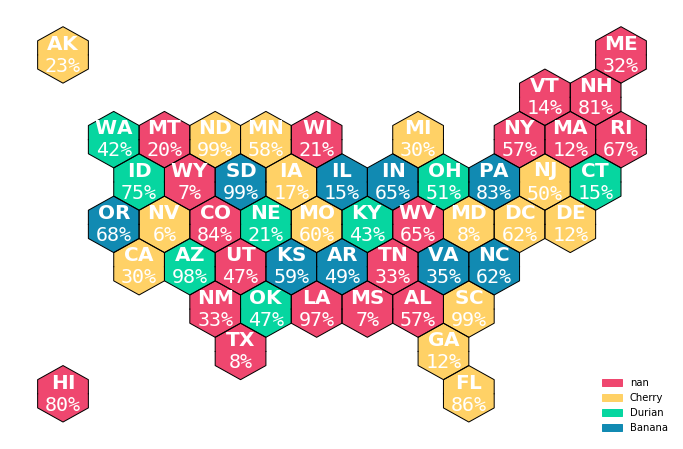

In [6]:
category_labels = {
    'Banana':'red',
    'Cherry': 'blue',
    'Apple': 'green',
    'Durian': 'purple'
}

shmapy.us_plot_hex(
    states[['state', 'category', 'values_label']], 
    size = 20, 
    chart_type='categorical', 
    line_color='black', 
    numeric_labels_custom='values_label',
    category_labels=['Banana','Cherry', 'Apple','Durian'],
    fill_color = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2'],
    figsize=(12, 8)
)

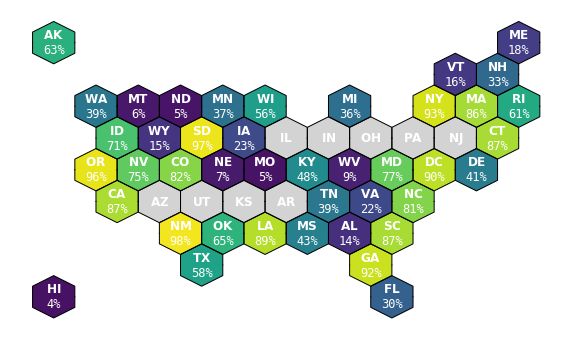

In [10]:
states = pd.DataFrame(pd.read_csv('../static/demo_input4.csv')['state'])
states['values'] = np.random.random(states.shape[0])

shmapy.us_plot_hex(
    states, 
    chart_type='choropleth', 
    numeric_labels='all',
    line_color='black',
    missing_text_color= 'white',
    missing_fill_color = 'lightgrey',
#     text_color='black',
    figsize=(10,6),
    size=12
)


## Facet Shmap

In [84]:
import matplotlib.pyplot as plt
import shmapy.facet_shmap

states = pd.DataFrame(np.repeat(list(shmapy.facet_shmap.get_state_coordinates()['code']), 20)).rename(columns={0:'state'})

states['x'] = np.random.random(states.shape[0])
states['y'] = np.random.random(states.shape[0]) + (1 * states.index)
states['color'] = np.random.choice(['#ef476f', '#ffd166', '#06d6a0', '#118ab2'], states.shape[0])
pa = states.loc[states.state=='PA']

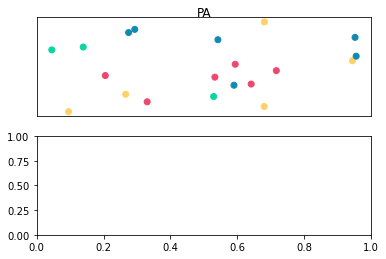

In [87]:
fig, ax = plt.subplots(2,1)

def scatter_a_state(ax, df):
    
    state_name = list(df.state)[0]
    
    ax.scatter(df.x, df.y, color=df.color,)
    ax.set_title(state_name,loc='center', size=12, y=.95)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

scatter_a_state(ax[0], pa)

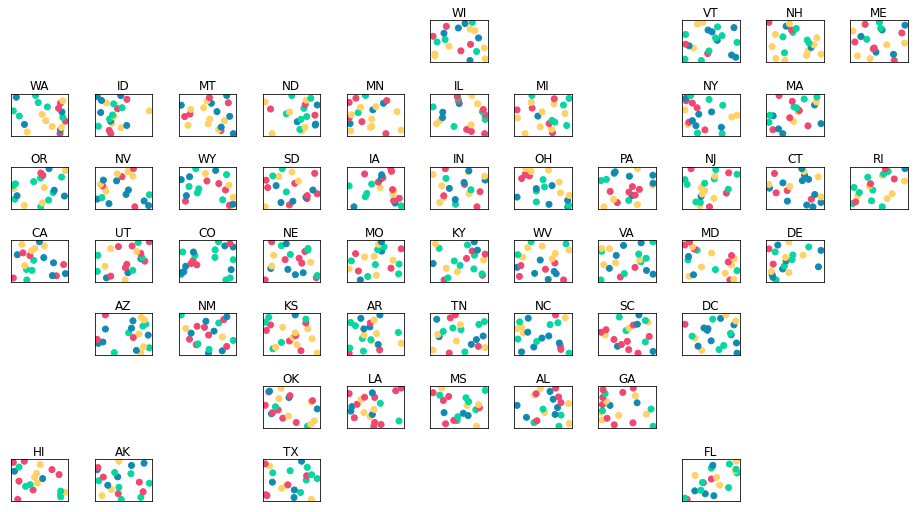

In [90]:
shmapy.facet_shmap.facet_plot_us(states, scatter_a_state, facet_col='state', figsize=(14,8))

In [92]:
pd.read_csv('../static/demo_input1.csv').assign(value=lambda x: x.value*10).to_csv('../demo_input6.csv', index=False)
